In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
data = pd.read_csv('output_results.csv', sep=';')


In [53]:
data = data[data['blk_per_message']==4]
#data = data.groupby('n_proc')['time'].mean()

In [54]:
data

,total_blks,time,blk_per_message,n_proc,n_nodos
3,17336456,28.437642,4,4,1
4,17336456,28.120290,4,4,1
5,17336456,27.295296,4,4,1
10,17336456,134.752687,4,4,2
11,17336456,140.537477,4,4,2
12,17336456,136.247343,4,4,2
24,17336456,19.842405,4,8,1
25,17336456,19.439910,4,8,1
27,17336456,19.973580,4,8,1
36,17336456,30.512422,4,16,1


In [55]:
#data = data[data['cpu_count']<=16]
#tempo base é a media do tempo de execucao com 1 processo só
tempo_base = 94.710959
data['speedup'] = 1/(data['time']/tempo_base)


In [56]:
data.sort_values(by=['n_proc'])

,total_blks,time,blk_per_message,n_proc,n_nodos,speedup
3,17336456,28.437642,4,4,1,3.330479
4,17336456,28.120290,4,4,1,3.368065
5,17336456,27.295296,4,4,1,3.469864
10,17336456,134.752687,4,4,2,0.702850
11,17336456,140.537477,4,4,2,0.673920
12,17336456,136.247343,4,4,2,0.695140
63,17336456,179.636030,4,8,4,0.527238
61,17336456,179.898224,4,8,4,0.526470
59,17336456,174.642447,4,8,4,0.542314
42,17336456,79.157063,4,8,2,1.196494


In [57]:
data_nodes_1 = data[data['n_nodos']==1]
average_time_nodes_1 = data_nodes_1.groupby('n_proc')['speedup'].mean()

In [58]:
data_nodes_1 = data[data['n_nodos']==1]
average_time_nodes_1 = data_nodes_1.groupby('n_proc')['speedup'].mean()

data_nodes_2 = data[data['n_nodos']==2]
average_time_nodes_2 = data_nodes_2.groupby('n_proc')['speedup'].mean()

data_nodes_4 = data[data['n_nodos']==4]
average_time_nodes_4 = data_nodes_4.groupby('n_proc')['speedup'].mean()



In [59]:
average_time_nodes_1

n_proc
4     3.389469
8     4.795652
16    3.091745
Name: speedup, dtype: float64

In [60]:
average_time_nodes_2

n_proc
4     0.690637
8     1.167828
16    0.827851
32    0.538251
Name: speedup, dtype: float64

In [61]:
average_time_nodes_4

n_proc
8     0.532007
16    0.815124
Name: speedup, dtype: float64

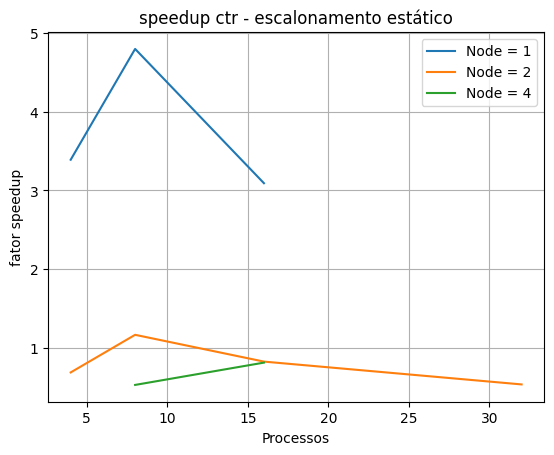

In [62]:


fig, ax = plt.subplots()
ax.plot(average_time_nodes_1.index,average_time_nodes_1.values,label="Node = 1")
ax.plot(average_time_nodes_2.index,average_time_nodes_2.values,label="Node = 2")
ax.plot(average_time_nodes_4.index,average_time_nodes_4.values,label="Node = 4")


ax.set_xlabel("Processos")
ax.set_ylabel('fator speedup')
ax.set_title('speedup ctr - escalonamento estático')
ax.legend()
ax.grid(True)
# plt.plot(average_time_nodes_1.index, average_time_nodes_1.values, label="Node 1")
# plt.subplot(average_time_nodes_2.index, average_time_nodes_2.values, label="Node 2")
# plt.subplot(average_time_nodes_4.index, average_time_nodes_4.values, label="Node 4")

plt.show()

In [63]:
ate_16 = dynamic_average_time_per_cpu_count[[1,2,4,8,16]]
de_16_ate_48 = dynamic_average_time_per_cpu_count[[16,32,48]]
plt.plot(ate_16.index, ate_16.values, color='green')
plt.plot(de_16_ate_48.index, de_16_ate_48.values, color='red')
plt.xlabel('Quantidade de Threads alocadas sobre os Núcleos')
plt.ylabel('Fator speedup')
plt.title('Speedup do CTR - Escalonamento Dinâmico')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(1, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

NameError: name 'dynamic_average_time_per_cpu_count' is not defined

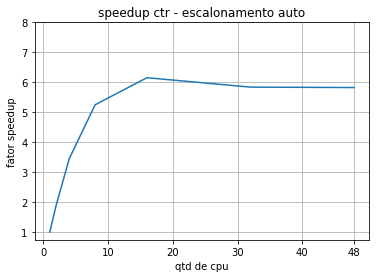

In [ ]:
plt.plot(auto_average_time_per_cpu_count.index, auto_average_time_per_cpu_count.values)
plt.xlabel('qtd de cpu')
plt.ylabel('fator speedup')
plt.title('speedup ctr - escalonamento auto')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(1, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

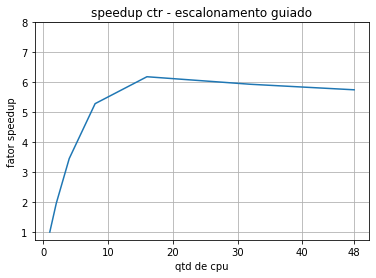

In [ ]:

plt.plot(guided_average_time_per_cpu_count.index, guided_average_time_per_cpu_count.values)
plt.xlabel('qtd de cpu')
plt.ylabel('fator speedup')
plt.title('speedup ctr - escalonamento guiado')
plt.grid(True)
x_intervals = np.array([ 0, 10, 20, 30, 40, 48]) 
y_intervals = np.arange(1, 9, 1) 
plt.xticks(x_intervals)
plt.yticks(y_intervals)
plt.show()

In [ ]:
auto_average_time_per_cpu_count
# guided_average_time_per_cpu_count

cpu_count
1     0.998893
2     1.905617
4     3.446949
8     5.249085
16    6.152430
Name: speedup, dtype: float64

In [ ]:
auto_average_time_per_cpu_count.values

array([0.99889264, 1.90561719, 3.44694944, 5.24908531, 6.15243035])